# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

---------------------------------------------------------------------------------------------------

## Parte 1
### 1.1. Haga una exploración rápida de sus datos para eso haga un resumen de su dataset.
##### Importar Librerías

Como primer paso, se importaron las siguientes librerías que permiten poder llevar a cabo el análisis respectivo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
import datetime
from pandas_profiling import ProfileReport
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



##### Datos

El tipo de data es un archivo csv por loque se uso el método read_csv de la libreria de pandas. También se obtienen las primeras filas del dataframe.

In [3]:
import pandas as pd

# Cargar el archivo CSV en un dataframe
data = pd.read_csv('wine_fraud.csv')

A continuación se presentan los primeros 5 y los últimos 5 datos. En este caso, como se puede observar a conmtinuación, quality y red son variables que representan texto. Estas se tendrán que convertir a variables dummy más adelante.

In [4]:
# Mostrar las primeras filas del dataframe
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

In [5]:
# Mostrar las ultimas filas del dataframe
print(data.tail())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality   type  
6492     11.2   Leg

#### Análisis Exploratorio de Datos (EDA)
A continuación se realizó un análisis exploratorio inicial para entender más a profundidad los datos; incluyendo los tipos de datos y qué significan los mismos. Por otro lado, también se quería encontrar datos faltantes, datos nulos, entre otros.

Como se puede observar, no se cuenta con datos nulos o faltantes.

<AxesSubplot: >

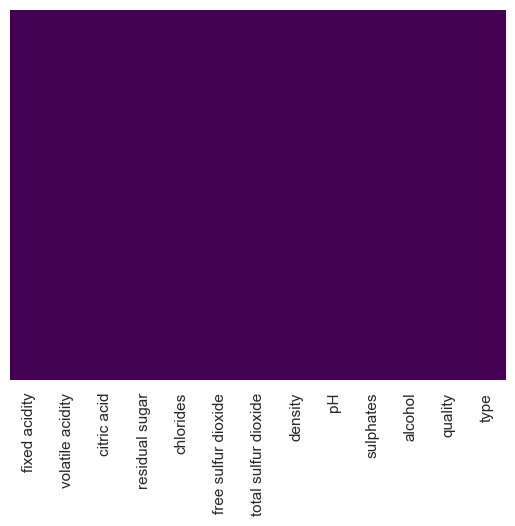

In [6]:
#analizar datos faltantes
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

A continuación se presenta el resumen de las columnas del dataset. Se presenta información sobre la cantidad de entradas (no vacías) relacionadas a cada columna, así como el tipo de información que almacena. En este caso, todas las columnas son numéricas excepto quality y type.

In [7]:
# Obtener información general sobre el conjunto de data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB
None


Asimismo, a continuación se presenta un resumen estadístico de las columnas numéricas, que incluye promedio, desviación estándar, y otros datos.

Las variables cuantitativas en este conjunto de datos es son fixed acidity, volatile acidity, ctric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, ph, suphates y alchohol. Estas variables son características de los vinos y son relevantes para evualar su calidad y en este caso, evaluar si fue eleborado con productos de mala calidad, haciendo un vino fraudulento. 

Para comprender mejor estas caracteristicas, realizamos estadísicas describiras para obtener la media, desvación estander, maximo, minimo y otros datos relevantes para el presente análisis. 

In [8]:
# Obtener un resumen estadístico de las columnas numéricas
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

--------------------
### 1.2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

fixed acidity         -------------         cuantitativa continua

volatile acidity      -------------         cuantitativa continua 

citric acid           -------------         cuantitativa continua 

residual sugar        -------------         cuantitativa continua 

chlorides             -------------         cuantitativa continua 

free sulfur dioxide   -------------         cuantitativa continua 

total sulfur dioxide  -------------         cuantitativa continua 

density               -------------         cuantitativa continua 

pH                    -------------         cuantitativa continua 

sulphates             -------------         cuantitativa continua 

alcohol               -------------         cuantitativa continua 

quality               -------------         categórica

type                  -------------         categórica

-------------
### 1.3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.



Se realizo un histograma de la variable fixed acidity y se puede observar como la acidez del vino tiende estar entre 6 y 8. Asimimso gracias al histograma de volatile acidtiy, se puede ver como la acidez volatil del vino tiende a tener un valor entre 0.2 y 0.4. El histograma del citric acid muestra que el acido citrico de un vino mayormente tiene un valor aproximado de 0.3. El cloruro es responsable de el toque salado de los vinos, que refuerza su sabor. Segun el histograma realizado, este tiene un valor entre 0 y 0.1. Posteriormente se realizo el hisograma de la variable free sulfur dioxide, la cual muestra que tiene frecuentemente un valor aproximado de 25. Asimismo, la variable de densidad tienen un valor casi siempre entre 0.9 y 1. El hisotrigrama del pH muestra una mayoria de valores entre 3.1 y 3.3. Esto tiene sentido pues los vinos blancos suelen presentar un pH de 3 y 3,3 mientras que la mayoría de los tintos suelen estar entre 3,3 y 3,6. Finalmente el histograma de la variable de alcohol muestra una tendencia de valores entre 9 y 10. Este dato tambien tiene sentido pues el vino tiende a tener una graduación alcohólica entre 8 y 13. 

Gracias a los diagrama de caja y bigotes pudimos obtener también las siguientes conclusiones:
1. El vino legítimo tiene una menor cantidad de azucares reisduales en promedio. 
2. Los vinos fraudulentos tienen una mayor acidez fija. 
3. Los vinos fraudulentos tienen una menor cantidad de alcohol. 
4. Los vinos fraudulentos tienen una mayor cantidad de acido volatil.
5. Los vinos legitimos tienen una myor cantidad de acidos citricos. 
6. La cantidad de cloruros enetre los vinos legítimos y fraudulentos es muy parecida, pero los fraudentos tienden a tener un poco más. 
7. Los vinos fraudulentos tienen menos dióxido de azufre (Dióxido de azufre se usa para preservar el color, sabor y estabilidad del vino.)
8. La densdad entre los vinos fraudulentos y legitimos es casi la misma. 
9. El pH entre entre los vinos fraudulentos y legitimos es casi el mismo. 

Finalmente, gracias a los diagramas de dispercion pudimos ver relaciones como:
1. Existe una relación entre la variable  "volatile acidity" y "ph". Esto tiene sentido pues el ácido volátil de un vino puede afectar su pH y, por lo tanto, su sabor y aroma.
2. Existe una relación entre la variable  "residual sugar" y "density". Esto ya que la cantidad de azúcar residual en un vino puede afectar su densidad y textura
3. Existe una relación entre la variable "chlorides" y "total sulfur dioxide". Esto es por que los niveles de cloruros y dióxido de azufre total en un vino pueden estar relaciónados con su sabor y aroma.
4. Existe una relación entre la variable "citric acid" y "pH". Esto es relevante pues el ácido cítrico en un vino puede afectar su pH y sabor.
5. Existe una relación entre la variable "fixed acidity" y "sulphates". Esto es también relevante pues los niveles de ácido fijo y sulfatos en un vino pueden estar relacionados con su acidez y sabor.
6. Existe una relación entre la variable "free sulfur dioxide" y "total sulfur dioxide". Esto es relevante para el vino pues los niveles de dióxido de azufre libre y total en un vino pueden estar relacionados con su capacidad para mantenerse fresco y protegerse contra la oxidación.

Gracias a los diagramas de caja y bigotes podemos ver como existen algunos datos atipicos en algunas de las varibales, sobre todo en las variables relaciondas a acidez y sulfatos. Estos datos pueden ser el resultado de los vinos fraudulentos, ya que en realidad son la minoría de datos. Esto podría ocasionar las discrepancias observadas.

Otra causa de los datos atípicos podría ser la existencia de vinos atípicos que cuenten con características fuera de lo común, que podrían alterar los datos.

No obstante, se decidió no eliminar ningún dato atípico pues puede ser relevante para el análisis de los datos posterior. Especialmente si son datos representativos de vinos fraudulentos.

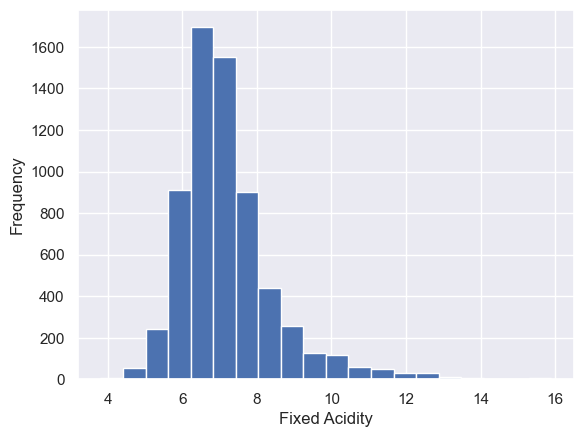

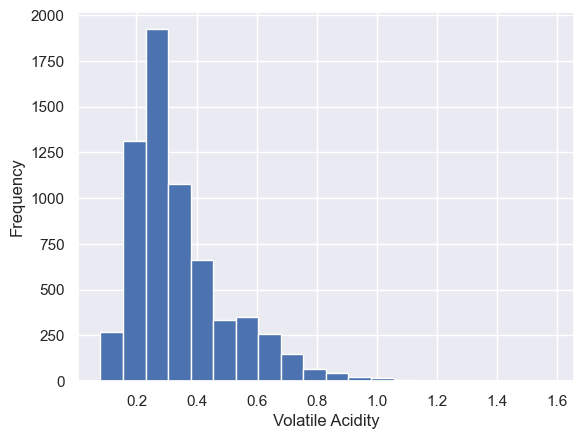

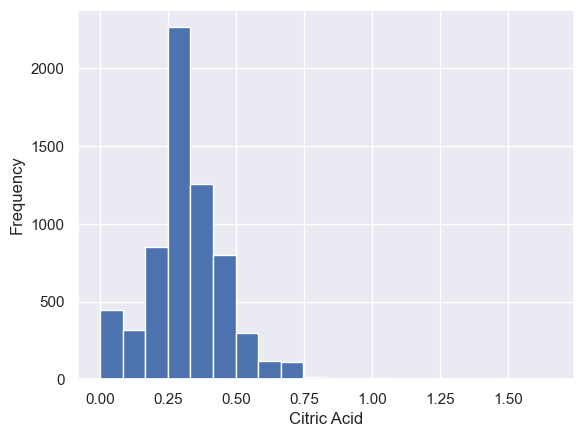

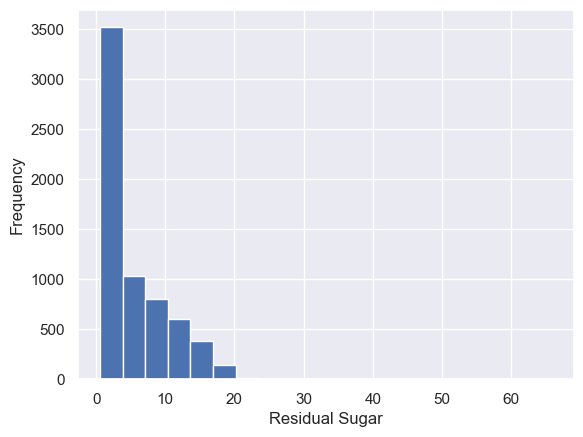

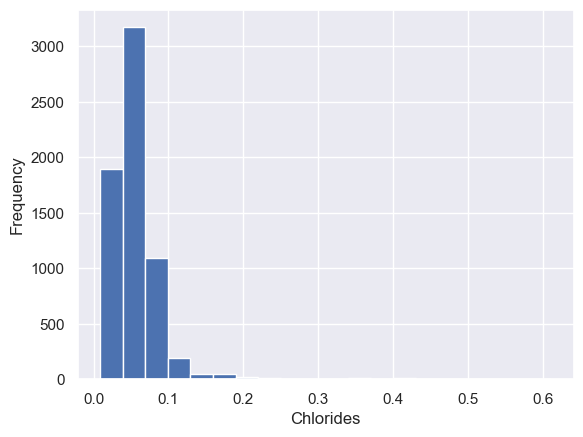

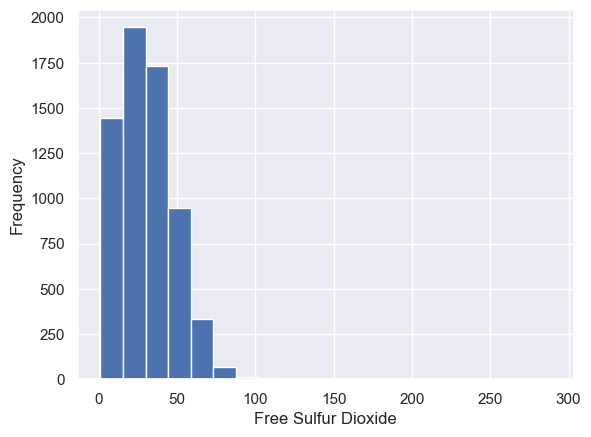

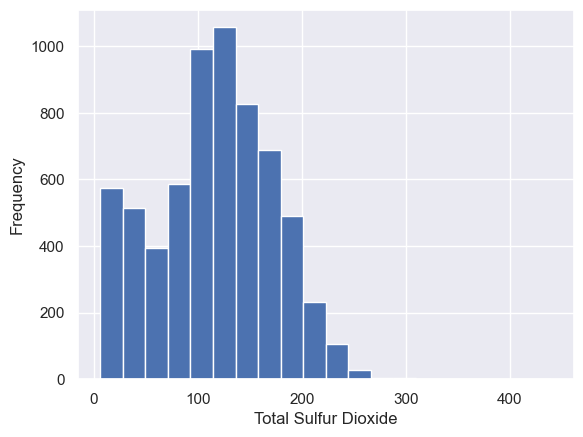

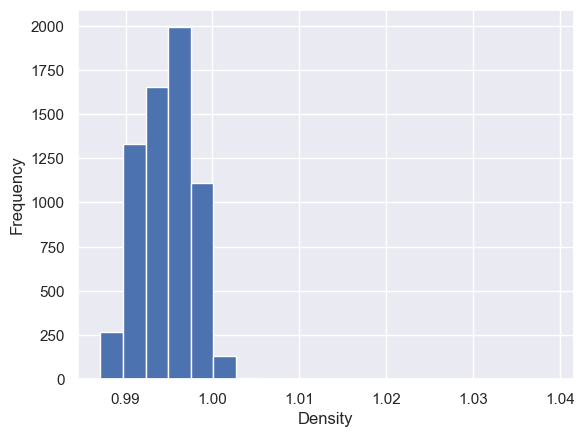

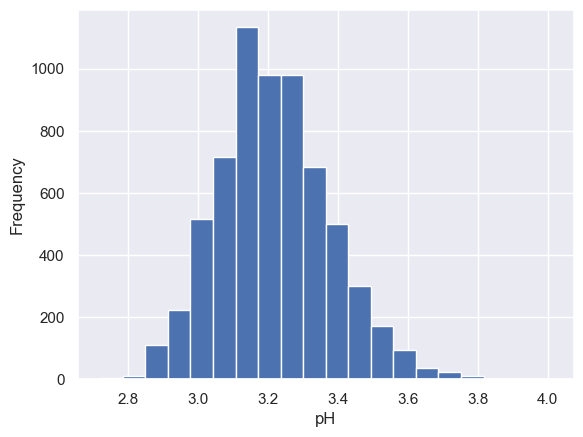

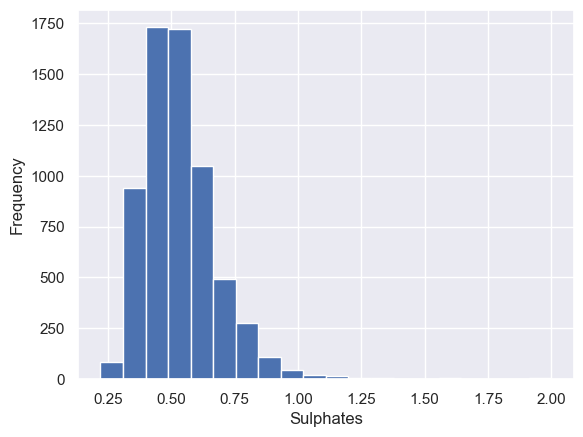

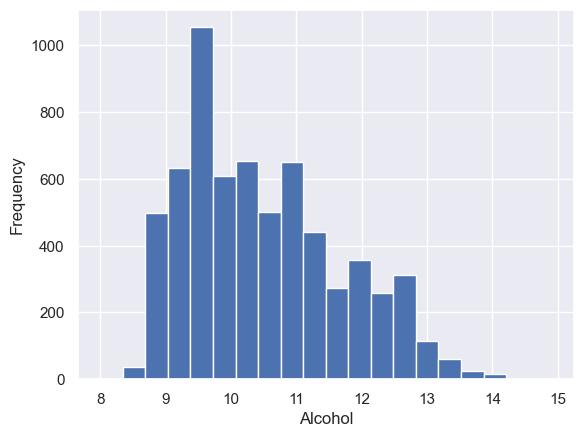

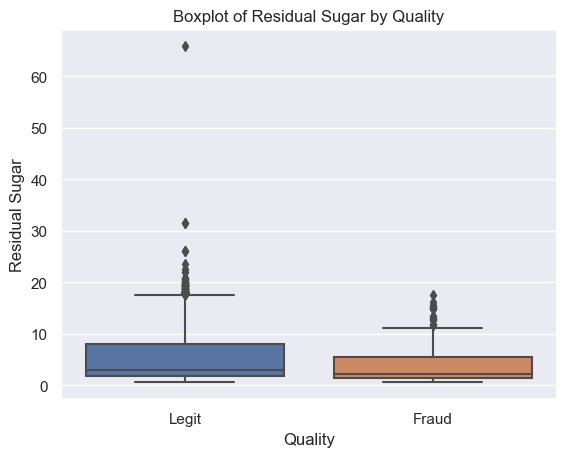

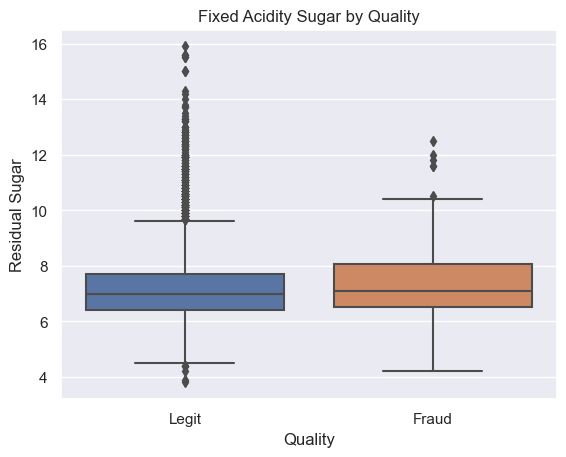

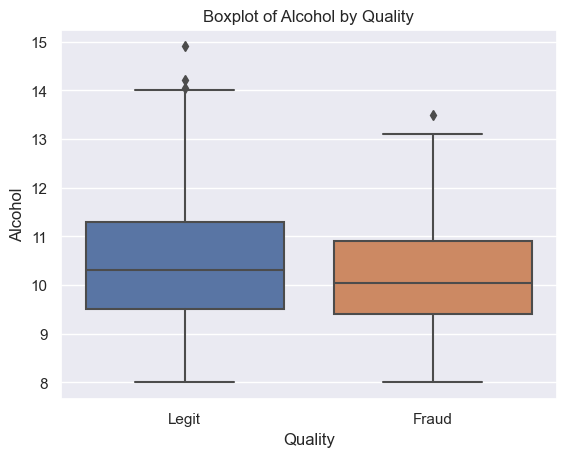

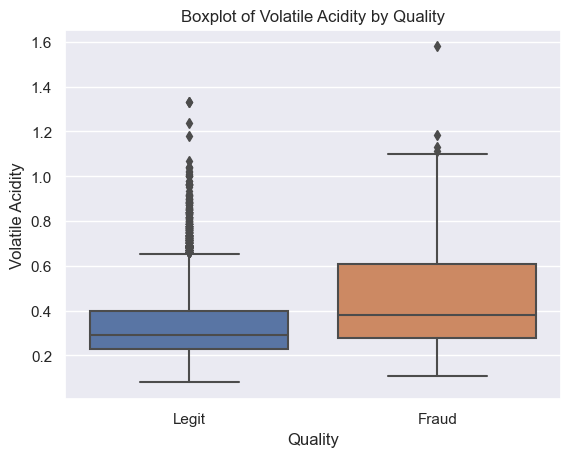

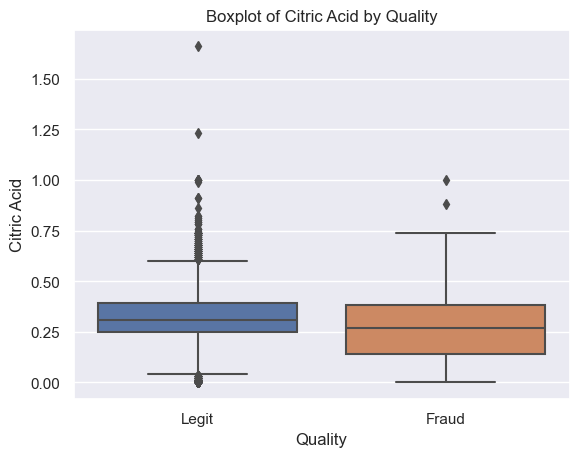

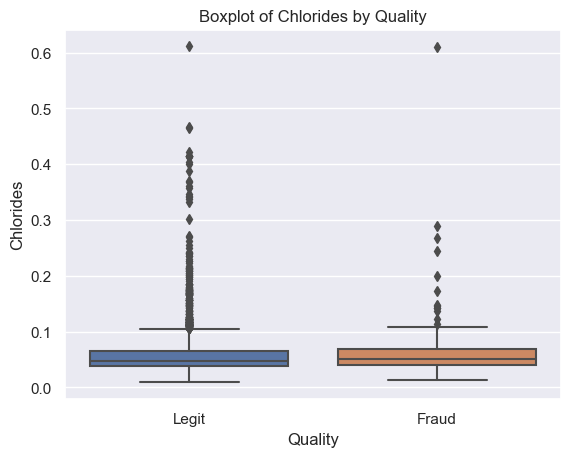

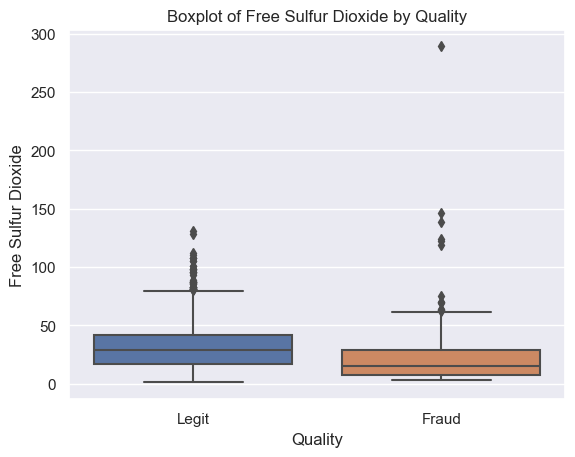

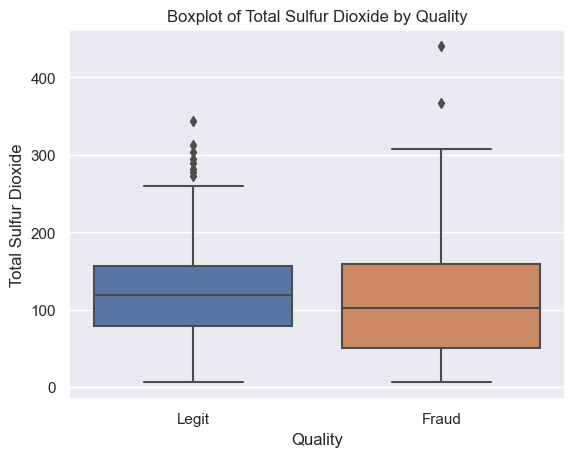

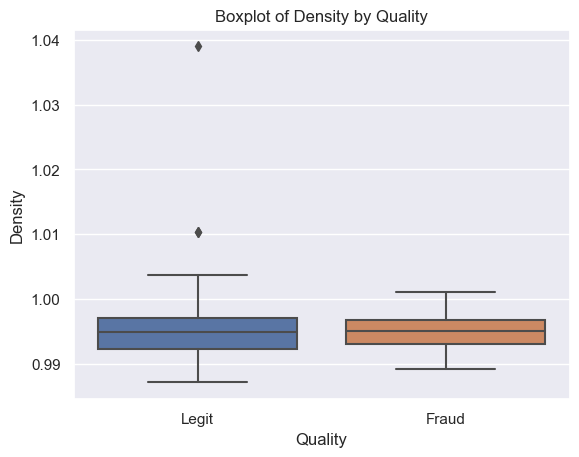

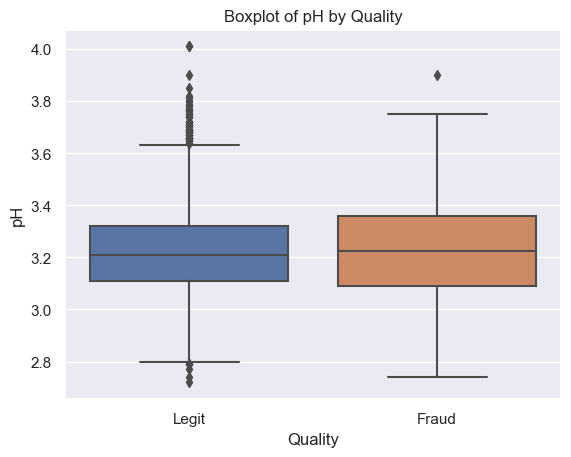

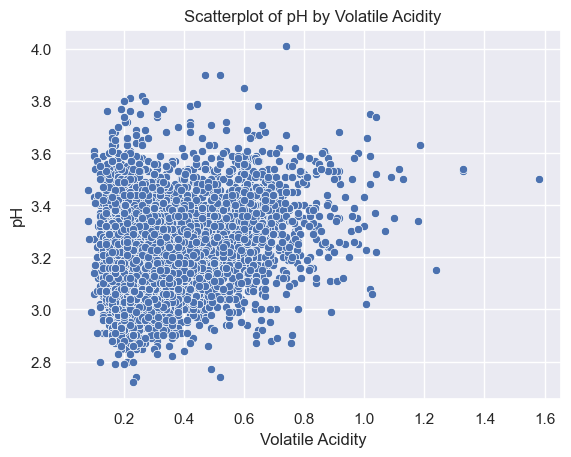

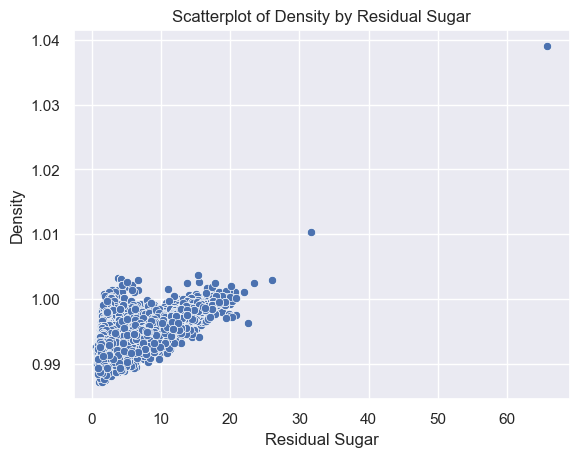

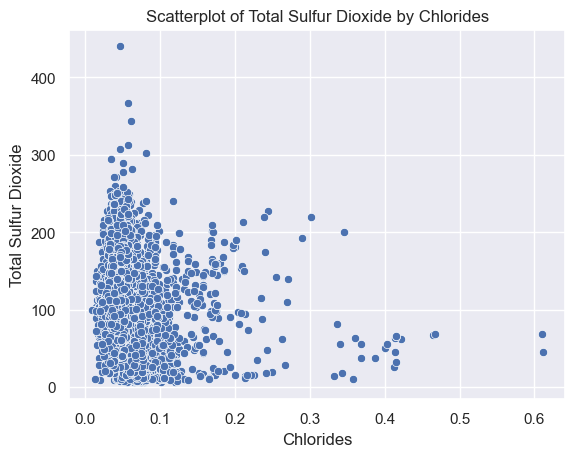

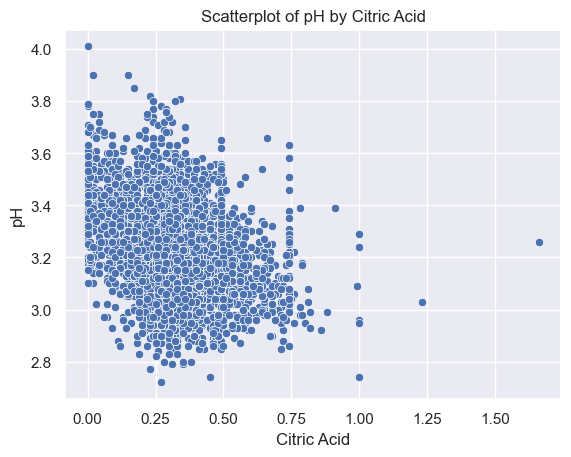

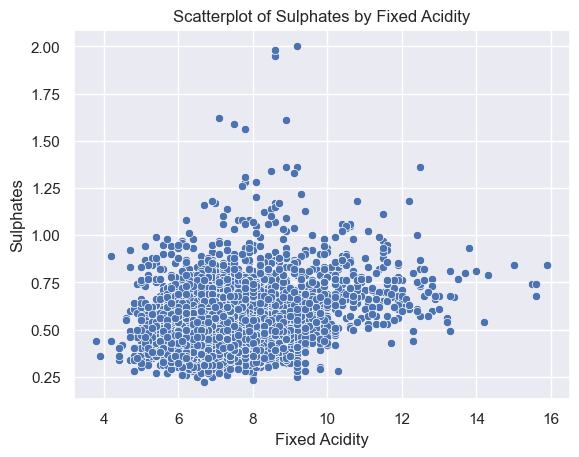

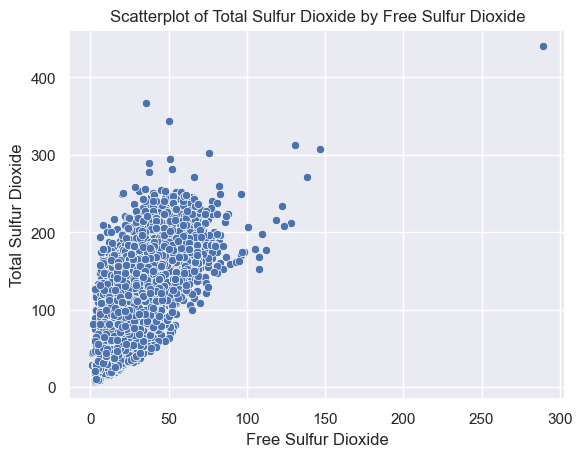

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable "fixed acidity"
plt.hist(data['fixed acidity'], bins=20)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "volatile acidity"
plt.hist(data['volatile acidity'], bins=20)
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "citric acid"
plt.hist(data['citric acid'], bins=20)
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "residual sugar"
plt.hist(data['residual sugar'], bins=20)
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "chlorides"
plt.hist(data['chlorides'], bins=20)
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "free sulfur dioxide"
plt.hist(data['free sulfur dioxide'], bins=20)
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "total sulfur dioxide"
plt.hist(data['total sulfur dioxide'], bins=20)
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "density"
plt.hist(data['density'], bins=20)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "pH"
plt.hist(data['pH'], bins=20)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "sulphates"
plt.hist(data['sulphates'], bins=20)
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "alcohol"
plt.hist(data['alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


# Graficar un diagrama de caja y bigotes de la variable "residual sugar" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Boxplot of Residual Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "fixed acidity" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Fixed Acidity Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "alcohol" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Boxplot of Alcohol by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "volatile acidity" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Boxplot of Volatile Acidity by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "citric acid" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Boxplot of Citric Acid by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "chlorides" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.title('Boxplot of Chlorides by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "free sulfur dioxide" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['free sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Boxplot of Free Sulfur Dioxide by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "total sulfur dioxide" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Boxplot of Total Sulfur Dioxide by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "density" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['density'])
plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('Boxplot of Density by Quality')
plt.show()


# Graficar un diagrama de caja y bigotes de la variable "pH" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Boxplot of pH by Quality')
plt.show()

#Graficar un grafico de dispersion de la variable "volatile acidity" por la variable "pH"
sns.scatterplot(x=data['volatile acidity'], y=data['pH'])
plt.xlabel('Volatile Acidity')
plt.ylabel('pH')
plt.title('Scatterplot of pH by Volatile Acidity')
plt.show()

#Graficar un grafico de dispersion de la variable "residual sugar" por la variable "density"
sns.scatterplot(x=data['residual sugar'], y=data['density'])
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.title('Scatterplot of Density by Residual Sugar')
plt.show()

#Graficar un grafico de dispersion de la variable "chlorides" por la variable "total sulfur dioxide"
sns.scatterplot(x=data['chlorides'], y=data['total sulfur dioxide'])
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatterplot of Total Sulfur Dioxide by Chlorides')
plt.show()

#Graficar un grafico de dispersion de la variable "citric acid" por la variable "pH"
sns.scatterplot(x=data['citric acid'], y=data['pH'])
plt.xlabel('Citric Acid')
plt.ylabel('pH')
plt.title('Scatterplot of pH by Citric Acid')
plt.show()

#Graficar un grafico de dispersion de la variable "fixed acidity" por la variable "sulphates"
sns.scatterplot(x=data['fixed acidity'], y=data['sulphates'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Sulphates')
plt.title('Scatterplot of Sulphates by Fixed Acidity')
plt.show()

#Graficar un grafico de dispersion de la variable "free sulfur dioxide" por la variable "total sulfur dioxide"
sns.scatterplot(x=data['free sulfur dioxide'], y=data['total sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatterplot of Total Sulfur Dioxide by Free Sulfur Dioxide')
plt.show()



-------------
### 1.4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

Gracias a la matriz de correlación se puede observar como existe una clara relación entre la densidad y el azucar residual; probablemente como resultado de cómo el azucar se puede disolver (y a qué nivel) en diferentes líquidos con distintas densidades. Asismimo entre la variable de azucar residual y dióxido de azufre total. Finalmente existe una estrecha relación entre la densidad y la acidez. 

Cabe destacar que existe una relación inversa entre la densidad y el nivel de alcohol. Esto teniendo un indicador de correlación de -0.69.

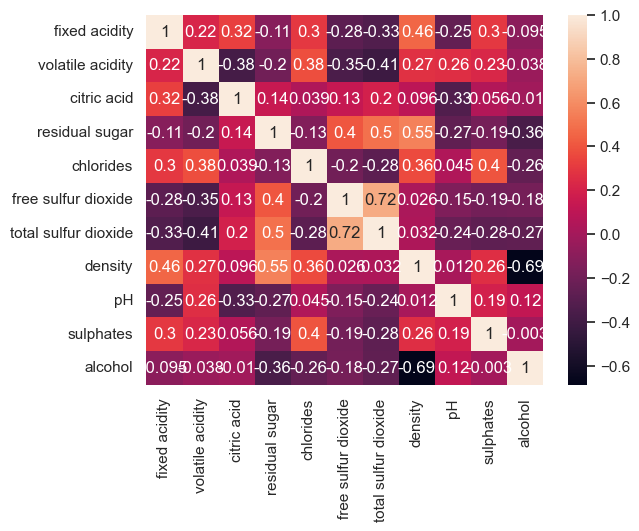

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.61it/s]


In [10]:
from pandas_profiling import ProfileReport

# separar las variables numéricas y categóricas
num_vars = data.select_dtypes(include=['int', 'float'])
cat_vars = data.select_dtypes(exclude=['int', 'float'])

# matriz de correlación númericas
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

#pandas profiling report
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("report.html")


--------
### 1.5. Utilice   las  variables   categóricas,   haga   tablas  de   frecuencia,   proporción,   gráficas de barras o cualquier otra técnica que le permita explorar los datos

En los datos se pueden observar dos varibles categórias, calidad y tipo. La variable calidd define si el vino es fraudulento o no, mientras que el tipo define si el vino es tinto o blanco. Se puede observar como existe una mayor cantidad de datos para los vinos legítimos, por lo que sera necesario balancear los datos más adelante. 


****************************
 quality 		Frecuencia 
****************************
Legit    6251
Fraud     246
Name: quality, dtype: int64

****************************
 type 		Frecuencia 
****************************
white    4898
red      1599
Name: type, dtype: int64

****************************
 quality 		Proporción 
****************************
Legit    0.962136
Fraud    0.037864
Name: quality, dtype: float64

****************************
 type 		Proporción 
****************************
white    0.753886
red      0.246114
Name: type, dtype: float64


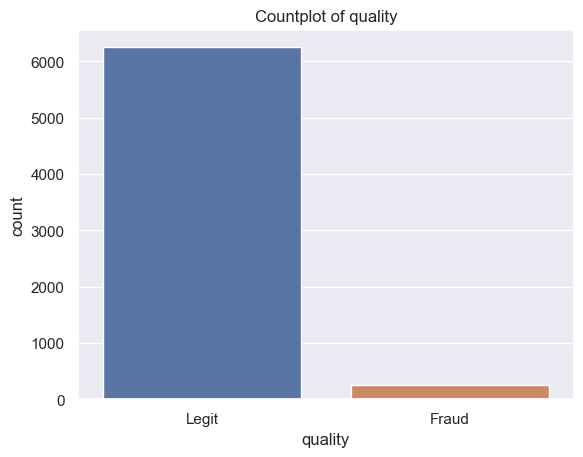

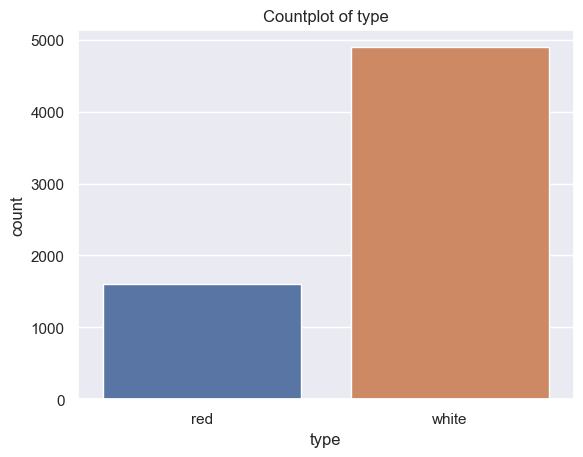

In [11]:
categoricas = ['quality', 'type']

# tablas de frecuencia variables categoricas
for col in categoricas:
    print("\n****************************\n",col,"\t\tFrecuencia","\n****************************")
    print(data[col].value_counts())

#tabla de proporciones
for col in categoricas:
    print("\n****************************\n",col,"\t\tProporción","\n****************************")
    print(data[col].value_counts(normalize=True))

#graficar variables categoricas
for col in categoricas:
    sns.countplot(x=data[col])
    plt.xlabel(col)
    plt.title('Countplot of {}'.format(col))
    plt.show()


A través de estas graficas nos podemos dar cuenta que los valores están desbalanceados. Esto debido a que Legit representa más del 96% de los datos, mientras que Fraud representa menos del 4%. Esto se solucionará a continuación.

---------
### 1.6. Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad

Durante el proceso de exploración, no se encontró con datos faltantes, datos raros, datos en formato inválido o cosas por el estilo. Por lo cual no hay necesidad de hacer mayor limpieza de datos.

En este caso, como primer punto se revisó que no hubieran datos faltantes. En este caso, se pudo determinar que no habían datos faltantes, por lo cual no se tenía que hacer ninguna modificación. Sin embargo, de igual forma se ejecutó el siguiente código para asegurarse de que todo estuviera relleno.

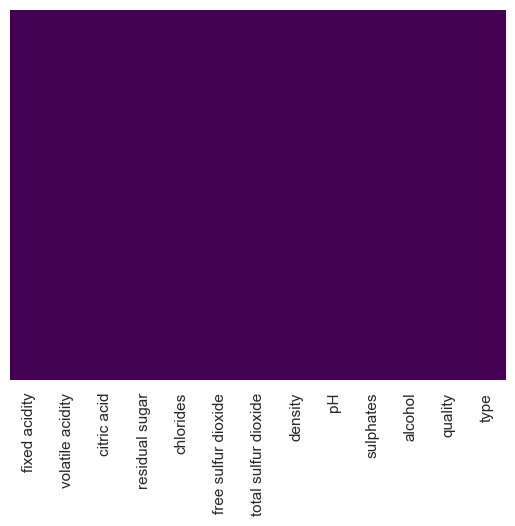

In [12]:
#analizar datos faltantes
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#reemplazar datos faltantes por la media de la columna
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)
data['free sulfur dioxide'].fillna(data['free sulfur dioxide'].mean(), inplace=True)
data['total sulfur dioxide'].fillna(data['total sulfur dioxide'].mean(), inplace=True)
data['density'].fillna(data['density'].mean(), inplace=True)
data['pH'].fillna(data['pH'].mean(), inplace=True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)
data['alcohol'].fillna(data['alcohol'].mean(), inplace=True)

A continuación, para poder utilizar los respectivos modelos... se pasó el valor de quality de legit a 1 y fraud a -1. Type se convirtió white a -1 y red a 1. A continuación se presenta el resultado. 

In [13]:
# Convertir quality a numerico y type a numerico

data['quality'] = data['quality'].map({'Fraud': -1, 'Legit': 1})
data['type'] = data['type'].map({'white': -1, 'red': 1})

In [14]:
# Visualizacion de cambios realizados
data.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  
6492     11.2        1    -1  
6493      9.6        1    -1  
6494      9.4        1    -1  
6495     12.8        1    -1  
6496     11.8        1    -1

Para finalizar, como se mencionó anteriormente, es necesario balancear los datos. Sin embargo, las funciones a utilizar cuentan con métodos y flags para que implementen dicho balanceo. Por tal razón, se utilizó dichas funciones integradas en la mayoría de casos; excepto en KNN que no lo permitía. 

A continuación se presenta el algoritmo para balanceo.

In [44]:
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = data[["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides" ,"free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = data["quality"]

#dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size = 0.25, random_state = 100)

#balanceo de los datos
n = y_entreno.shape[0]
cant_fraud = Counter(Y)[-1]
cant_legit = Counter(Y)[1]

print("Cantidad de valores: ", n)
print("Cantidad de fraudes: ", cant_fraud)
print("Cantidad de legítimos: ", cant_legit)

####################        Balanceo        ########################
# Clases separadas
minority_class = data[data['quality'] == -1]
majority_class = data[data['quality'] == 1]

# Aumento de clase de minoria
minority_unsampled = resample(minority_class, replace=True, n_samples=len(majority_class))

# Concatenar clases
upsampled = pd.concat([majority_class, minority_unsampled])

# Mostrar clases balanceadas
X2 = upsampled.drop('quality', axis=1)
Y2 = upsampled['quality']

X_entreno_resampled, X_prueba_resampled, y_entreno_resampled, y_prueba_resampled = train_test_split(X2, Y2, test_size = 0.25, random_state = 0)

n_balanced = Y2.shape[0]
cant_fraud_balanced = Counter(Y2)[-1]
cant_legit_balanced = Counter(Y2)[1]

print("\nCantidad de valores (balanceados): ", n_balanced)
print("Cantidad de fraudes (balanceados): ", cant_fraud_balanced)
print("Cantidad de legítimos (balanceados): ", cant_legit_balanced)

Cantidad de valores:  4872
Cantidad de fraudes:  246
Cantidad de legítimos:  6251

Cantidad de valores (balanceados):  12502
Cantidad de fraudes (balanceados):  6251
Cantidad de legítimos (balanceados):  6251


-----------
## Parte 2
### 2.1. Clasificación

##### Importar Librerías
El primer paso para poder realizar los diferentes modelos de clasificación es importar las librerías y separar los datos de entrenamiento y prueba.

> Cabe destacar que el conjunto de datos fue balanceado dentro de cada modelo, para así asegurar que el modelo funcione de forma correcta.

In [34]:
#Regresion logistica Simple
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix 

#Separar las variables independientes de la variable dependiente
X = data[["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides" ,"free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = data["quality"]

#dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size = 0.25, random_state = 100)

#### Regresión Logística Simple

Como se puede observar, se obtuvo una exactitud de 0.7298 en la predicción realizada con regresión logística simple. Cabe destacar que se balancearon los datos correspondientes para poder obtener un análisis equitativo de las clases. 

Asimismo, con la matriz de confusión podemos observar como 439 valores fueron calculados incorrectamente. Por otro lado, por el reporte de clasificación también podemos determinar la precisión que se tuvo al predecir los valores de -1 (fraude) y 1 (legit). En este caso, se tuvo una precisión de 0.98 para determinar si un vino es real y 0.07 para determinar si no es real.

In [35]:
# Re split de los datos para randomizar
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size = 0.25, random_state = 100)

modeloLog = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state=100)
modeloLog.fit(X_entreno,y_entreno)

predicciones = modeloLog.predict(X_prueba)
print(classification_report(y_prueba, predicciones))
print(confusion_matrix(y_prueba, predicciones))
print(accuracy_score(y_prueba, predicciones))

              precision    recall  f1-score   support

          -1       0.07      0.55      0.13        60
           1       0.98      0.74      0.84      1565

    accuracy                           0.73      1625
   macro avg       0.53      0.64      0.49      1625
weighted avg       0.94      0.73      0.81      1625

[[  33   27]
 [ 412 1153]]
0.7298461538461538


#### KNN (K-Nearest Neighbors)

Para este modelo, primero se evaluó cómo diferentes valores de K pueden afectar los resultados. Para esto, se probó con K=1 hasta K=40.  A continuación se presentan los resultados (cabe destacar que se usaron datos anteriormente balanceados en la sección de limpieza).


> En este caso, como se puede ver a continuación, la gráfica indica que los valores de K mientras más grandes causan más error. Por tal razón, se debe escoger un valor que produzca un bajo error pero que no cause overfitting.

Text(0, 0.5, 'Tasa de Error')

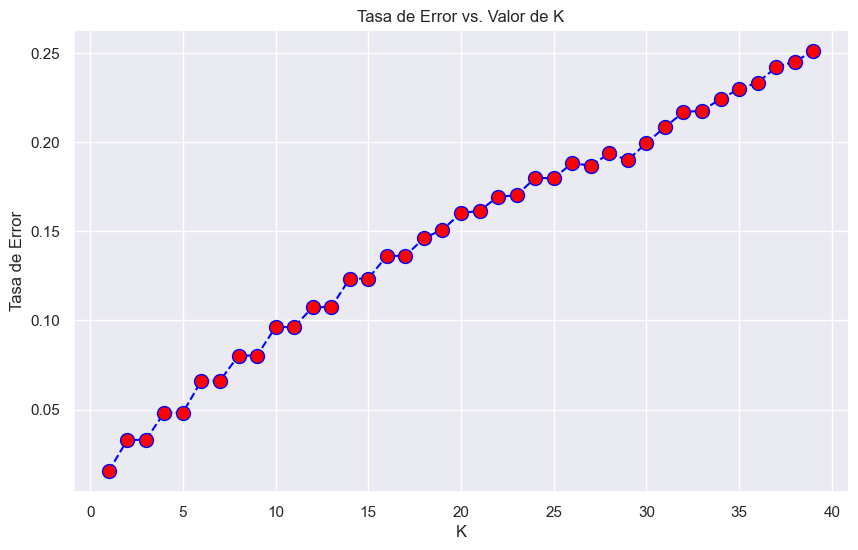

In [49]:
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

tasa_error = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno_resampled, y_entreno_resampled)
    pred_i = knn.predict(X_prueba_resampled)
    
    tasa_error.append(np.mean(pred_i != y_prueba_resampled))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

En este caso, se obtuvo una puntuación de 0.9037 de exactitud con la clasificación KNN. Cabe destacar que se decició utilizar un K de 10 pues como se ven en la gráfica anterior, es un punto donde se tiene un error bajo aún sin que ocasione overfitting. 

Asimismo, con la matriz de confusión podemos observar como 301 valores fueron calculados incorrectamente. Por otro lado, por el reporte de clasificación también podemos determinar la precisión que se tuvo al predecir los valores de -1 (fraude) y 1 (legit). En este caso, se tuvo una precisión de 1 para determinar si un vino es real y de 0.84 para determinar si no es real.

In [53]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_entreno_resampled,y_entreno_resampled)
pred = knn.predict(X_prueba_resampled)

print(confusion_matrix(y_prueba_resampled,pred))
print(classification_report(y_prueba_resampled,pred))
print(accuracy_score(y_prueba_resampled, pred))

[[1599    0]
 [ 301 1226]]
              precision    recall  f1-score   support

          -1       0.84      1.00      0.91      1599
           1       1.00      0.80      0.89      1527

    accuracy                           0.90      3126
   macro avg       0.92      0.90      0.90      3126
weighted avg       0.92      0.90      0.90      3126

0.9037108125399872


#### SVM (Suppor Vector Machine)

En este caso, nuevamente debemos hacer uso de **datos balanceados**. Sin embargo, como primer paso, se usó GridSearchCV para determinar qué hiperparámetros son los más ótpimos para el respectivo modelo.

Como se puede observar a continuación, en este caso se obtuvo como mejor hiperparámetros los siguientes:
1. 'C': 0.01 
2. 'degree': 2, 
3. 'gamma': 'scale', 
4. 'kernel': 'rbf'

In [20]:
# Support Vector Machine con sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Cross validation con grid search
from sklearn.model_selection import GridSearchCV

#-----> Balanceo de datos
svm = SVC(class_weight='balanced', random_state=100)

param_grid = {'C':[0.01, 0.1, 1],
             'kernel':['linear', 'rbf', 'poly'],
              'gamma':['scale', 'auto'],
              'degree':[2, 3]}

grid = GridSearchCV(svm, param_grid, refit=True, verbose=0)

# Obtener conjuntos con menos datos para hacer el Cross Validation con Grid Search
X_grid, y_grid = None, None

while True:
    X_grid, _, y_grid, _ = train_test_split(X_prueba, y_prueba, test_size = 0.9, random_state = 100)

    if Counter(y_grid)[-1] > 5:
        break

grid.fit(X_grid, y_grid)

print('Mejores parámetros:',grid.best_params_)

Mejores parámetros: {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


A partir de los hiperparámetros calculados, se logró obtener un valor de 0.7095 de exactitud con el modelo SVM. Cabe destacar que se usaron los hiperparámetros que producen el valor mayor de exactitud. 

Asimismo, con la matriz de confusión podemos observar como 472 valores fueron calculados incorrectamente. Por otro lado, por el reporte de clasificación también podemos determinar la precisión que se tuvo al predecir los valores de -1 (fraude) y 1 (legit). En este caso, se tuvo una precisión de 0.98 para determinar si un vino es real y de 0.07 para determinar si no es real.

In [26]:
# Hacer modelo con los mejores parámetros
svm = SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'], class_weight='balanced', random_state=10)
svm.fit(X_entreno, y_entreno)

# Hacer predicciones
predictions = svm.predict(X_prueba)

print(confusion_matrix(y_prueba,predictions))
print(classification_report(y_prueba,predictions))
print(accuracy_score(y_prueba, predictions))

[[  33   27]
 [ 445 1120]]
              precision    recall  f1-score   support

          -1       0.07      0.55      0.12        60
           1       0.98      0.72      0.83      1565

    accuracy                           0.71      1625
   macro avg       0.52      0.63      0.47      1625
weighted avg       0.94      0.71      0.80      1625

0.7095384615384616


## **Hallazgos y Conclusiones**
Al analizar los datos sobre los proveedores de vinos, se puede observar que hay ciertas características que evidencian si un vino es legítimo o es simplemente un fraude. Aunque la botella pueda pretender ser un vino mucho más caro, los contenidos de esta siguen siendo vino barato, lo cual significa que no tiene las características esperadas por el costo del producto. Algunas de estas características son: el ácido cítrico, el azucar residual, y el pH del vino. Las diferencias pueden ser sutiles, pero al analizar todos estos valores en conjunto, se pueden encontrar patrones que permiten determinar si el vino es legítimo o un fraude. Es importante utilizar estas características objetivas, ya que el sabor no es un buen indicador de si el vino es un fraude o no. Esto se debe a que el sabor de un vino es en gran parte subjetivo, a diferencia de las otras variables cuantificables que son objetivas. 

Adicionalmente, se observó la importancia de crear un nuevo split de datos de prueba y entrenamiento para cada uno de los modelos utilizados. Esto se debe a que al utilizar el mismo split para todos los modelos, se puede llegar a obtener el mismo resultado en todos de manera erronea. Se busca que los resultados de cada modelo sean diferentes para que se pueda validar los resultados de un modelo con los otros, y para que se pueda decidir que modelo utilizar. Debido a que el split de datos toma datos de manera aleatoria, esto tambien permite validar que los modelos funcionen con todos los datos proveidos. Al no realizar este split más de una vez, se pierden estos beneficios ya que todos los modelos trabajan sobre los mismos datos. 

Al crear los modelos respectivos, se logró determinar el grado de exactitud de cada uno:
1. La regresión logística tiene una exactitud de 72.98%, con 439 valores siendo categorizados incorrectamente.
2. El modelo KNN (con 14 vecinos) tiene una exactitud de 90.37%, con 301 valores siendo categorizados incorrectamente.
3. El modelo SVM (C=0.01 , gamma=scale , kernel=rbf, degree=2 ) tiene una exactitud de 70.98%, con 472 valores siendo categorizados incorrectamente. 

Al crear un modelo analizando las características de los vinos, se logró determinar con una exactitud de 0.96 si el vino es un fraude o no. 

En base a los modelos creados, se puede concluir que los datos son suficientemente buenos para que la empresa pueda determinar si el vino que van a comprar es genuino antes de realizar la compra. Para futuras compras, se recomienda que todo vino sea analizado por el modelo de KNN con 10 vecinos para que no se vuelvan a presentar incidentes de vinos fraudulentos. Esto debido a que dicho modelo presentó la menor cantidad de error y tiene un nivel más alto de accuracy. 